<a href="https://colab.research.google.com/github/enzo-buthiot/Projet_Mignot/blob/master/The_Notebook_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to the Notebook**

### Let's mount the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task 1 :
Installing pyspark module

In [ ]:
!pip install pyspark

Importing the modules

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct
import matplotlib.pyplot as plts

creating spark session

In [2]:
spark = SparkSession.builder.appName('spark_app').getOrCreate()

# Task 2 :
importing the *Listenings.csv* file:

In [ ]:
listening_csv_path = "/content/drive/MyDrive/dataset/listenings.csv"
listening_df = spark.read.format("csv").option("inferSchema", True).option('header', True).load(listening_csv_path)

let's check the data:

In [ ]:
listening_df.show()

let's delete useless columns:

In [ ]:
listening_df = listening_df.drop('date')

drop the null rows:

In [ ]:
listening_df = listening_df.na.drop()

let's check the dataset again:

In [ ]:
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

let's see the schema:

In [ ]:
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



let's see the shape of our dataframe:

In [ ]:
shape = (listening_df.count(), len(listening_df.columns))
print(shape)

(13758905, 4)


# Task 3:

**Query #0:**
select two columns: track and artist

In [ ]:
q0 = listening_df.select('artist', 'track')
q0.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [ ]:
q1 = listening_df.select('*').filter(listening_df.artist == "Rihanna")
q1.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [ ]:
q2 = listening_df.select('user_id').filter(listening_df.artist == "Rihanna").groupby('user_id').agg(count("user_id").alias('count')).orderBy(desc('count')).limit(10)
q2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



**Query #3:**

find top 10 famous tracks

In [ ]:
q3 = listening_df.select('artist', 'track').groupby('artist','track').agg(count("*").alias("count")).orderBy(desc("count")).limit(10)
q3.show()

+--------------+----------------+-----+
|        artist|           track|count|
+--------------+----------------+-----+
| Justin Bieber|           Sorry| 3381|
|Arctic Monkeys|Do I Wanna Know?| 2865|
|      Bon Iver|     Skinny Love| 2836|
|          Zayn|      PILLOWTALK| 2701|
|   The Killers|   Mr Brightside| 2690|
|       Rihanna|            Work| 2646|
|      Bastille|         Pompeii| 2606|
|Mumford & Sons| Little Lion Man| 2520|
|Mumford & Sons|        The Cave| 2485|
| Justin Bieber|   Love Yourself| 2481|
+--------------+----------------+-----+



**Query #4:**

find top 10 famous tracks of ***Rihanna***

In [ ]:
q4 = listening_df.select("artist", "track").filter(listening_df.artist == "Rihanna").groupby("artist","track").agg(count("track").alias("count")).orderBy(desc("count")).limit(10)
q4.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 2646|
|Rihanna|Only Girl (In the...| 1749|
|Rihanna|We Found Love (fe...| 1575|
|Rihanna|                 S&M| 1307|
|Rihanna|            Rude Boy| 1303|
|Rihanna|            Diamonds| 1224|
|Rihanna|      Kiss it Better|  945|
|Rihanna| Where Have You Been|  844|
|Rihanna|Cheers (Drink to ...|  697|
|Rihanna|           Needed Me|  679|
+-------+--------------------+-----+



**Query #5:**

find top 10 famous albums

In [ ]:
q5 = listening_df.select("artist", "album").groupby("artist","album").agg(count("*").alias("count")).orderBy(desc("count")).limit(10)
q5.show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



# Task 4 :
importing the ***genre.csv*** file:

In [ ]:
genre_csv_path = "/content/drive/MyDrive/dataset/genre.csv"
genre_df = spark.read.format("csv").option("inferSchema", True).option('header', True).load(genre_csv_path)

let's check the data

In [ ]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



Let's inner join these two data frames

In [ ]:
data = listening_df.join(genre_df, how = "inner", on=['artist'])
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

**Query #6**

find top 10 users who are fan of ***pop*** music

In [ ]:
q6 = data.select('user_id').filter(data.genre == "pop").groupby("user_id").agg(count("user_id").alias("count")).orderBy(desc("count")).limit(10)
q6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [ ]:
q7 = data.select("genre").groupby("genre").agg(count("genre").alias("count")).orderBy(desc("count")).limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



# Task 5:
**Query #8**

find out each user favourite genre

In [ ]:
q8_1 = data.select("user_id", "genre").groupby("user_id", "genre").agg(count("*").alias("count")).orderBy("user_id")
q8_1.show()

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph| Boston Pops Orch...|    1|
| --Seph|               Bjorn|    8|
| --Seph|                 pop|    9|
| --Seph| brazilian pop music|    1|
| --Seph|          Nils Frahm|    1|
| --Seph| Snoop Dogg & Dev...|    4|
| --Seph|               dance|    1|
| --Seph|        instrumental|    1|
| --Seph|  progressive trance|    1|
| --Seph|   Vladimir Spivakov|    1|
| --Seph|          Thom Yorke|    2|
| --Seph|               samba|    2|
| --Seph|               Ruben|    4|
| --Seph|             ambient|    6|
| --Seph|           classical|   31|
| --Seph| Sara Mingardo & ...|    1|
| --Seph|               indie|    3|
| --Seph|             baroque|    1|
| --Seph|         heavy metal|    1|
| --Seph|     Hilko Schomerus|    1|
+-------+--------------------+-----+
only showing top 20 rows



In [ ]:
q8_2 = q8_1.groupby("user_id").agg(max(struct(col("count"), col("genre"))).alias("max")).select(col("user_id"), col("max.genre"))
q8_2.show()

+---------------+-----------+
|        user_id|      genre|
+---------------+-----------+
|      --Shinn--|       rock|
|       --ollz--|       rock|
|     -Amnesiac-|      metal|
|         -Bish-|       rock|
|        -Danni-|       rock|
|          -DeWp|    hip hop|
|      -Faction-|       rock|
|-February-Star-|       rock|
|        -Gemma-|british pop|
|   -Gingergirl-|        pop|
|        -Hazel-|   synthpop|
|        -Heiko-| electronic|
|         -Katie|      lo-fi|
|      -Krystal-|       rock|
|         -Mark-| indie rock|
|       -Mullet-|  metalcore|
|          -Robs|       rock|
| -SleepingStar-|black metal|
|      -Stifler-|       rock|
|  -Toxic-Waste-|  aggrotech|
+---------------+-----------+
only showing top 20 rows



**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart

In [ ]:
q9 = genre_df.select("genre").filter( (col('genre')=='pop') | (col('genre')=='rock') | (col('genre')=='metal') | (col('genre')== "hip hop") ).groupby("genre").agg(count("genre").alias("count"))
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



Now, let's visualize the results using ***matplotlib***

In [ ]:
q9_list = q9.collect()

In [ ]:
labels = [row['genre'] for row in q9_list]
counts = [row['count'] for row in q9_list]

now lets visualize these two lists using a bar chart

In [ ]:
print(labels)
print(counts)

['pop', 'hip hop', 'metal', 'rock']
[6960, 4288, 1854, 9066]


<BarContainer object of 4 artists>

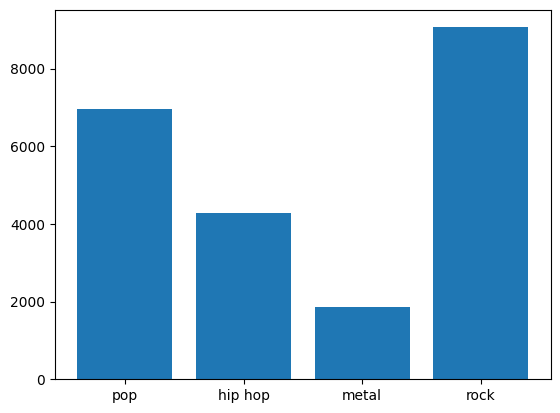

In [ ]:
plts.bar(labels, counts)

#**Deuxième cours sur pyspark**



In [ ]:
mydata = spark.read.format("csv").option("header", "true").load("original.csv")

In [ ]:
mydata.show()

+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude|  Longitude|
+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18|50.5774075| 16.4967184|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|48.8231572|103.5218199|
|  3|    Alvera|  Di Boldi|Female|           NULL|                NULL|$57576.52|39.9947462|116.3397725|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23|44.5047212| 38.1300171|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|      NULL| 37.6489954|
|  6|     Maris|      Folk|Female|Kinsealy-Drinan|      Civil Engineer|$30101.16|53.4266145| -6.1644997|
|  7|     Masha|    Divers|Female|         Dachun|     

In [ ]:
from pyspark.sql.functions import *
# withColumn("clean_city") -> Create a new column called "clean_city"
# When the column City is null gives the value "Unknown", otherwise print the normal value of the column city
mydata2 = mydata.withColumn("clean_city", when(mydata.City.isNull(), "Unknown").otherwise(mydata.City))

In [ ]:
mydata2.show()

+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude|  Longitude|     clean_city|
+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18|50.5774075| 16.4967184|      Nowa Ruda|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|48.8231572|103.5218199|         Bulgan|
|  3|    Alvera|  Di Boldi|Female|           NULL|                NULL|$57576.52|39.9947462|116.3397725|        Unknown|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23|44.5047212| 38.1300171|  Divnomorskoye|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|      NULL| 37.6489954|      Mytishchi|
|  6|     Maris|      Folk|Femal

In [ ]:
# Remove the rows where JobTitle is null
mydata2 = mydata2.filter(mydata2.JobTitle.isNotNull())
mydata2.show()

+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude|  Longitude|     clean_city|
+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18|50.5774075| 16.4967184|      Nowa Ruda|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|48.8231572|103.5218199|         Bulgan|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23|44.5047212| 38.1300171|  Divnomorskoye|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|      NULL| 37.6489954|      Mytishchi|
|  6|     Maris|      Folk|Female|Kinsealy-Drinan|      Civil Engineer|$30101.16|53.4266145| -6.1644997|Kinsealy-Drinan|
|  8|   Goddart|     Flear|  Mal

In [ ]:
# Create a new column "clean_salary" where we take the column "salary" (that is a string)
# and we select the 2 character untill the 100 maximum and then we convert the character to 'float' (cast("float"))
mydata2 = mydata2.withColumn("clean_salary", mydata2.Salary.substr(2,100).cast('float'))
mydata2.show()

+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+------------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude|  Longitude|     clean_city|clean_salary|
+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+------------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18|50.5774075| 16.4967184|      Nowa Ruda|    57438.18|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|48.8231572|103.5218199|         Bulgan|     62846.6|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23|44.5047212| 38.1300171|  Divnomorskoye|    61489.23|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|      NULL| 37.6489954|      Mytishchi|    63863.09|
|  6|     Maris|      Folk|Female|Kinsealy-Drinan|      Civil 

In [ ]:
# Calcul la moyenne de la colonne "clean_salary"
# take(1)[0][0] takes the first row and the first value of the dataframe
mean = mydata2.groupBy().avg("clean_salary").take(1)[0][0]

In [ ]:
print(mean)

55516.32088199837


In [ ]:
# lit is the literal value, it lets you set a static value as the value of a column
from pyspark.sql.functions import lit

In [ ]:
# Quand une valeur de la colonne "clean_salary" est null, remplace la par la moyenne de "clean_salary", sinon garde la valeur initial de clean_salary
mydata2 = mydata2.withColumn('new_salary', when(mydata2.clean_salary.isNull(), lit(mean)).otherwise(mydata2.clean_salary))

In [ ]:
mydata2.show()

+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+------------+----------------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude|  Longitude|     clean_city|clean_salary|      new_salary|
+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+------------+----------------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18|50.5774075| 16.4967184|      Nowa Ruda|    57438.18|   57438.1796875|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|48.8231572|103.5218199|         Bulgan|     62846.6|   62846.6015625|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23|44.5047212| 38.1300171|  Divnomorskoye|    61489.23|  61489.23046875|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|      NULL| 3

In [ ]:
import numpy as np
latitudes = mydata2.select('Latitude')

In [ ]:
latitudes.show()

+----------+
|  Latitude|
+----------+
|50.5774075|
|48.8231572|
|44.5047212|
|      NULL|
|53.4266145|
|45.1905186|
| 32.027934|
|  4.272793|
|     -5.85|
| 39.172378|
|49.8151822|
|42.1014803|
|49.7923299|
|43.4945737|
|52.7441662|
| 38.696249|
|-7.7232567|
|40.7172049|
|  49.16291|
|40.7576842|
+----------+
only showing top 20 rows



In [ ]:
# We removes the null to compute the median later
latitudes = latitudes.filter(latitudes.Latitude.isNotNull())

In [ ]:
latitudes.show()

+----------+
|  Latitude|
+----------+
|50.5774075|
|48.8231572|
|44.5047212|
|53.4266145|
|45.1905186|
| 32.027934|
|  4.272793|
|     -5.85|
| 39.172378|
|49.8151822|
|42.1014803|
|49.7923299|
|43.4945737|
|52.7441662|
| 38.696249|
|-7.7232567|
|40.7172049|
|  49.16291|
|40.7576842|
|48.4902808|
+----------+
only showing top 20 rows



In [ ]:
latitudes = latitudes.withColumn('latitudes2', latitudes.Latitude.cast('float')).select('latitudes2')

In [ ]:
latitudes.show()

+----------+
|latitudes2|
+----------+
| 50.577408|
|  48.82316|
| 44.504723|
| 53.426613|
| 45.190517|
| 32.027935|
|  4.272793|
|     -5.85|
|  39.17238|
|  49.81518|
|  42.10148|
|  49.79233|
| 43.494576|
| 52.744167|
| 38.696247|
|-7.7232566|
| 40.717205|
|  49.16291|
| 40.757683|
|  48.49028|
+----------+
only showing top 20 rows



In [ ]:
# We compute the median of the column using numpy library
# latitudes.collect() means that we collect all the values from the dataframe latitudes
median = np.median(latitudes.collect())

In [ ]:
print(median)

31.93397331237793


In [ ]:
mydata2 = mydata2.withColumn('Lat', when(mydata2.Latitude.isNull(), lit(median)).otherwise(mydata2.Latitude))

In [ ]:
mydata2.show()

+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+------------+----------------+-----------------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude|  Longitude|     clean_city|clean_salary|      new_salary|              Lat|
+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+------------+----------------+-----------------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18|50.5774075| 16.4967184|      Nowa Ruda|    57438.18|   57438.1796875|       50.5774075|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|48.8231572|103.5218199|         Bulgan|     62846.6|   62846.6015625|       48.8231572|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23|44.5047212| 38.1300171|  Divnomorskoye|    61489.23|  61489.23046875|     

In [ ]:
import pyspark.sql.functions as sqlfunc
# Groupe les colonnes par genre (male ou female) et fait la moyenne des salaires
# alias('AvgSalary') correspond juste au nom qu'on va donner à la colonne une fois qu'on fera un print du résultat
genders = mydata2.groupBy('gender').agg(sqlfunc.avg('new_salary').alias('AvgSalary'))

In [ ]:
genders.show()

+------+------------------+
|gender|         AvgSalary|
+------+------------------+
|Female|55677.250125558036|
|  Male| 55361.09385573019|
+------+------------------+



In [ ]:
df = mydata2.withColumn('female_salary', when(mydata2.gender == 'Female', mydata2.new_salary).otherwise(lit(0)))
df.show()

+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+------------+----------------+-----------------+----------------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude|  Longitude|     clean_city|clean_salary|      new_salary|              Lat|   female_salary|
+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+------------+----------------+-----------------+----------------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18|50.5774075| 16.4967184|      Nowa Ruda|    57438.18|   57438.1796875|       50.5774075|   57438.1796875|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|48.8231572|103.5218199|         Bulgan|     62846.6|   62846.6015625|       48.8231572|   62846.6015625|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...

In [ ]:
df = df.withColumn('male_salary', when(df.gender == 'Male', df.new_salary).otherwise(lit(0)))
df.show()

+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+------------+----------------+-----------------+----------------+----------------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude|  Longitude|     clean_city|clean_salary|      new_salary|              Lat|   female_salary|     male_salary|
+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+------------+----------------+-----------------+----------------+----------------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18|50.5774075| 16.4967184|      Nowa Ruda|    57438.18|   57438.1796875|       50.5774075|   57438.1796875|             0.0|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|48.8231572|103.5218199|         Bulgan|     62846.6|   62846.6015625|       48.8231572|   62846.6015625|   

In [ ]:
mean_male = df.groupBy().avg('male_salary').take(1)[0][0]
print(mean_male)

28179.795269249436


In [ ]:
mean_female = df.groupBy().avg('female_salary').take(1)[0][0]
print(mean_female)

27336.525612748934


In [ ]:
df2 = df.groupBy('JobTitle').agg(sqlfunc.avg('female_salary').alias('final_female_salary'), sqlfunc.avg('male_salary').alias('final_male_salary'))

In [ ]:
df2.show()

+--------------------+-------------------+------------------+
|            JobTitle|final_female_salary| final_male_salary|
+--------------------+-------------------+------------------+
|Systems Administr...|    50590.474609375|  15540.9501953125|
|   Media Manager III| 29586.436197916668|17381.920572916668|
|  Recruiting Manager| 34848.452473958336|  26383.4951171875|
|       Geologist III|       31749.046875|    12830.75390625|
|        Geologist II|                0.0|   43293.865234375|
|Database Administ...|                0.0|     52018.4609375|
|   Financial Analyst|    23353.776953125|       39606.05625|
|  Analyst Programmer|   16406.1287109375|  21042.9634765625|
|Software Engineer II|                0.0|      74782.640625|
|       Accountant IV|    82732.248046875|               0.0|
|    Product Engineer|     41825.48359375|       20464.94375|
|Software Test Eng...|   32218.6083984375|   27122.462890625|
|Safety Technician...|                0.0|   29421.529296875|
|    Jun

In [ ]:
df2 = df2.withColumn('delta', df2.final_female_salary - df2.final_male_salary)
df2.show()

+--------------------+-------------------+------------------+-------------------+
|            JobTitle|final_female_salary| final_male_salary|              delta|
+--------------------+-------------------+------------------+-------------------+
|Systems Administr...|    50590.474609375|  15540.9501953125|   35049.5244140625|
|   Media Manager III| 29586.436197916668|17381.920572916668|       12204.515625|
|  Recruiting Manager| 34848.452473958336|  26383.4951171875|  8464.957356770836|
|       Geologist III|       31749.046875|    12830.75390625|     18918.29296875|
|        Geologist II|                0.0|   43293.865234375|   -43293.865234375|
|Database Administ...|                0.0|     52018.4609375|     -52018.4609375|
|   Financial Analyst|    23353.776953125|       39606.05625|   -16252.279296875|
|  Analyst Programmer|   16406.1287109375|  21042.9634765625| -4636.834765625001|
|Software Engineer II|                0.0|      74782.640625|      -74782.640625|
|       Accounta

In [ ]:
cityavg = mydata2.groupby('City').agg(sqlfunc.avg('new_salary').alias('avg_salary'))
cityavg

DataFrame[City: string, avg_salary: double]

In [ ]:
cityavg = cityavg.sort(desc('avg_salary'))
cityavg.show()

+-----------------+-------------+
|             City|   avg_salary|
+-----------------+-------------+
|        Mesopotam|  99948.28125|
|       Zhongcheng| 99942.921875|
|           Caxias|99786.3984375|
|      Karangtawar|99638.9921875|
|        Itabaiana|  99502.15625|
|           Pasian|  99421.34375|
|           Webuye| 99368.546875|
|      Yuktae-dong| 99250.828125|
|           Zinder|  99222.84375|
|   Timiryazevskiy|   99142.9375|
|        Sawahbaru|99013.7109375|
|          Madimba|98737.8671875|
|         Huangshi|  98690.34375|
|          Gharyan|   98679.3125|
|         Yŏnan-ŭp| 98628.609375|
|     Wringinputih|98603.8203125|
|Monte da Boavista|  98586.71875|
|          Klukeng|98439.4921875|
|         Murmashi|  98226.15625|
|        Fox Creek|      98138.0|
+-----------------+-------------+
only showing top 20 rows



# Bringing data into dataframes

In [ ]:
# Other way to import data into a dataframe
df2 = spark.read.csv('original.csv', header=True)
df2.show()

# Other file formats are simple. E.g. spark.read.text(...)

+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude|  Longitude|
+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18|50.5774075| 16.4967184|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|48.8231572|103.5218199|
|  3|    Alvera|  Di Boldi|Female|           NULL|                NULL|$57576.52|39.9947462|116.3397725|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23|44.5047212| 38.1300171|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|      NULL| 37.6489954|
|  6|     Maris|      Folk|Female|Kinsealy-Drinan|      Civil Engineer|$30101.16|53.4266145| -6.1644997|
|  7|     Masha|    Divers|Female|         Dachun|     

In [ ]:
# Type of the columns
df2.dtypes

[('id', 'string'),
 ('first_name', 'string'),
 ('last_name', 'string'),
 ('gender', 'string'),
 ('City', 'string'),
 ('JobTitle', 'string'),
 ('Salary', 'string'),
 ('Latitude', 'string'),
 ('Longitude', 'string')]

In [ ]:
# Definie les types des colonnes dans un object appelé 'schema'
from pyspark.sql.types import *
myschema = StructType([
    StructField("id", IntegerType()),
    StructField("first_name", StringType()),
    StructField("last_name", StringType()),
    StructField("gender", StringType()),
    StructField("City", StringType()),
    StructField("JobTitle", StringType()),
    StructField("Salary", StringType()),
    StructField("Latitude", FloatType()),
    StructField("Longitude", FloatType())
])

# Importe les données et converti le type des colonnes en correspondance
# avec le schema qu'on a defini juste au dessus
df3 = spark.read.csv('original.csv', header=True, schema=myschema)
df3.show()

+---+----------+----------+------+---------------+--------------------+---------+----------+----------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude| Longitude|
+---+----------+----------+------+---------------+--------------------+---------+----------+----------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18| 50.577408| 16.496717|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|  48.82316| 103.52182|
|  3|    Alvera|  Di Boldi|Female|           NULL|                NULL|$57576.52| 39.994747|116.339775|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23| 44.504723| 38.130016|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|      NULL| 37.648994|
|  6|     Maris|      Folk|Female|Kinsealy-Drinan|      Civil Engineer|$30101.16| 53.426613|-6.1644998|
|  7|     Masha|    Divers|Female|         Dachun|              

In [ ]:
df3.dtypes

[('id', 'int'),
 ('first_name', 'string'),
 ('last_name', 'string'),
 ('gender', 'string'),
 ('City', 'string'),
 ('JobTitle', 'string'),
 ('Salary', 'string'),
 ('Latitude', 'float'),
 ('Longitude', 'float')]

# Inspecting a dataframe

In [ ]:
# Show first 15 columns
df3.head(15)

[Row(id=1, first_name='Melinde', last_name='Shilburne', gender='Female', City='Nowa Ruda', JobTitle='Assistant Professor', Salary='$57438.18', Latitude=50.57740783691406, Longitude=16.49671745300293),
 Row(id=2, first_name='Kimberly', last_name='Von Welden', gender='Female', City='Bulgan', JobTitle='Programmer II', Salary='$62846.60', Latitude=48.823158264160156, Longitude=103.52182006835938),
 Row(id=3, first_name='Alvera', last_name='Di Boldi', gender='Female', City=None, JobTitle=None, Salary='$57576.52', Latitude=39.994747161865234, Longitude=116.33977508544922),
 Row(id=4, first_name='Shannon', last_name="O'Griffin", gender='Male', City='Divnomorskoye', JobTitle='Budget/Accounting Analyst II', Salary='$61489.23', Latitude=44.504722595214844, Longitude=38.1300163269043),
 Row(id=5, first_name='Sherwood', last_name='Macieja', gender='Male', City='Mytishchi', JobTitle='VP Sales', Salary='$63863.09', Latitude=None, Longitude=37.64899444580078),
 Row(id=6, first_name='Maris', last_name

In [ ]:
# Show first row
df3.first()

Row(id=1, first_name='Melinde', last_name='Shilburne', gender='Female', City='Nowa Ruda', JobTitle='Assistant Professor', Salary='$57438.18', Latitude=50.57740783691406, Longitude=16.49671745300293)

In [ ]:
# Gives statistics for each column
# count : returns the number of value inside a column
df3.describe().show()

+-------+-----------------+----------+---------+------+-------------------+-------------------+---------+------------------+-----------------+
|summary|               id|first_name|last_name|gender|               City|           JobTitle|   Salary|          Latitude|        Longitude|
+-------+-----------------+----------+---------+------+-------------------+-------------------+---------+------------------+-----------------+
|  count|             1000|      1000|     1000|  1000|                999|                998|     1000|               999|             1000|
|   mean|            500.5|      NULL|     NULL|  NULL|               NULL|               NULL|     NULL| 25.43151724702484|43.33756460386515|
| stddev|288.8194360957494|      NULL|     NULL|  NULL|               NULL|               NULL|     NULL|24.579082550156635| 69.4206453674681|
|    min|                1|   Abagail|    Abbay|Female|             Abéché|Account Coordinator|$10101.92|         -54.28115|       -123.04196|

In [ ]:
# Gives the names of the columns
df3.columns

['id',
 'first_name',
 'last_name',
 'gender',
 'City',
 'JobTitle',
 'Salary',
 'Latitude',
 'Longitude']

In [ ]:
# Total number of rows in the dataframe
df3.count()

1000

In [ ]:
# total number of unique rows in the dataframe
df3.distinct().count()

1000

# Handling null and duplicate values

In [ ]:
# Drop all rows that has at least one NA
df_dropped = df3.na.drop()
df_dropped.show()

+---+----------+----------+------+---------------+--------------------+---------+----------+----------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude| Longitude|
+---+----------+----------+------+---------------+--------------------+---------+----------+----------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18| 50.577408| 16.496717|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|  48.82316| 103.52182|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23| 44.504723| 38.130016|
|  6|     Maris|      Folk|Female|Kinsealy-Drinan|      Civil Engineer|$30101.16| 53.426613|-6.1644998|
|  8|   Goddart|     Flear|  Male|      Trélissac|Desktop Support T...|$46116.36| 45.190517| 0.7423124|
|  9|      Roth|O'Cannavan|  Male|         Heitan|VP Product Manage...|$73697.10| 32.027935| 106.65711|
| 10|      Bran|   Trahear|  Male|       Arbeláez|Mechanical Sys

In [ ]:
# Keep rows where the column JobTitle has not any NA
df_null_jobs = df3.filter(df3.JobTitle.isNotNull())
df_null_jobs.show()

+---+----------+----------+------+---------------+--------------------+---------+----------+----------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude| Longitude|
+---+----------+----------+------+---------------+--------------------+---------+----------+----------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18| 50.577408| 16.496717|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|  48.82316| 103.52182|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23| 44.504723| 38.130016|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|      NULL| 37.648994|
|  6|     Maris|      Folk|Female|Kinsealy-Drinan|      Civil Engineer|$30101.16| 53.426613|-6.1644998|
|  8|   Goddart|     Flear|  Male|      Trélissac|Desktop Support T...|$46116.36| 45.190517| 0.7423124|
|  9|      Roth|O'Cannavan|  Male|         Heitan|VP Product Man

In [ ]:
# Need to import those functions because we can't run the when() function otherwise
from pyspark.sql.functions import *
# Create a new column "Clean_city" where we replace the null in column 'City' by 'Unknown'
df_handled = df3.withColumn("Clean_city", when(df3.City.isNull(), "Unknown").otherwise(df3.City))
df_handled.show()

+---+----------+----------+------+---------------+--------------------+---------+----------+----------+---------------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude| Longitude|     Clean_city|
+---+----------+----------+------+---------------+--------------------+---------+----------+----------+---------------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18| 50.577408| 16.496717|      Nowa Ruda|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|  48.82316| 103.52182|         Bulgan|
|  3|    Alvera|  Di Boldi|Female|           NULL|                NULL|$57576.52| 39.994747|116.339775|        Unknown|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23| 44.504723| 38.130016|  Divnomorskoye|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|      NULL| 37.648994|      Mytishchi|
|  6|     Maris|      Folk|Female|Kinsea

In [ ]:
# Drop the duplicate rows (rows that are exactly the same)
df_no_duplicates = df.dropDuplicates()
df_no_duplicates.show()

+---+----------+----------+------+----------------+--------------------+---------+-----------+-----------+----------------+------------+---------------+-----------+---------------+--------------+
| id|first_name| last_name|gender|            City|            JobTitle|   Salary|   Latitude|  Longitude|      clean_city|clean_salary|     new_salary|        Lat|  female_salary|   male_salary|
+---+----------+----------+------+----------------+--------------------+---------+-----------+-----------+----------------+------------+---------------+-----------+---------------+--------------+
| 24|    Nichol|    Holtum|Female|           Město|           Paralegal|$27797.98| 49.9718258| 12.8846277|           Město|    27797.98| 27797.98046875| 49.9718258| 27797.98046875|           0.0|
|150|    Erhard|    Clewer|  Male|            Kupu|Occupational Ther...|$49458.47|   -8.47822| 115.245682|            Kupu|    49458.47|    49458.46875|   -8.47822|            0.0|   49458.46875|
|412|      Gram|    

# Selecting and filtering data



In [ ]:
# Definie les types des colonnes dans un object appelé 'schema'
from pyspark.sql.types import *
myschema = StructType([
    StructField("id", IntegerType()),
    StructField("first_name", StringType()),
    StructField("last_name", StringType()),
    StructField("gender", StringType()),
    StructField("City", StringType()),
    StructField("JobTitle", StringType()),
    StructField("Salary", StringType()),
    StructField("Latitude", FloatType()),
    StructField("Longitude", FloatType())
])

# Importe les données et converti le type des colonnes en correspondance
# avec le schema qu'on a defini juste au dessus
df = spark.read.csv('original.csv', header=True, schema=myschema)
df.show()

+---+----------+----------+------+---------------+--------------------+---------+----------+----------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude| Longitude|
+---+----------+----------+------+---------------+--------------------+---------+----------+----------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18| 50.577408| 16.496717|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|  48.82316| 103.52182|
|  3|    Alvera|  Di Boldi|Female|           NULL|                NULL|$57576.52| 39.994747|116.339775|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23| 44.504723| 38.130016|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|      NULL| 37.648994|
|  6|     Maris|      Folk|Female|Kinsealy-Drinan|      Civil Engineer|$30101.16| 53.426613|-6.1644998|
|  7|     Masha|    Divers|Female|         Dachun|              

In [ ]:
# Select the columns 'first_name' and 'last_name' from the dataframe
df_select = df.select('first_name', 'last_name')
df_select.show()

+----------+----------+
|first_name| last_name|
+----------+----------+
|   Melinde| Shilburne|
|  Kimberly|Von Welden|
|    Alvera|  Di Boldi|
|   Shannon| O'Griffin|
|  Sherwood|   Macieja|
|     Maris|      Folk|
|     Masha|    Divers|
|   Goddart|     Flear|
|      Roth|O'Cannavan|
|      Bran|   Trahear|
|    Kylynn|   Lockart|
|       Rey|    Meharg|
|      Kerr|    Braden|
|    Mickie| Whanstall|
|    Kaspar|     Pally|
|    Norbie|    Gwyllt|
|    Claude|    Briant|
|     Thain|    Habbon|
|  Tiffanie|  Pattison|
|    Ettore|  Gerriets|
+----------+----------+
only showing top 20 rows



In [ ]:
# Rename the column
df_renamed = df.withColumnRenamed('first_name', 'fn').sort(asc('fn'))
df_renamed.show()

+---+--------+----------+------+--------------------+--------------------+---------+----------+----------+
| id|      fn| last_name|gender|                City|            JobTitle|   Salary|  Latitude| Longitude|
+---+--------+----------+------+--------------------+--------------------+---------+----------+----------+
|594| Abagail|  Franklin|Female|             Gengwan| Account Coordinator|$67073.36| 29.162252|119.729416|
|514|   Abbot|    Spaice|  Male|              Baoyou|  Speech Pathologist|$22066.55| 40.657978| 109.84032|
|825|   Abbye|MacAndreis|Female|           Chandmanĭ|Accounting Assist...|$87792.30| 45.336964|  97.96857|
|640| Abelard|   Fawbert|  Male|          Sumurgayam|   Marketing Manager|$84911.09| -6.888394|112.330795|
|470|    Abey|    Mesant|  Male|              Shedok|     Sales Associate|$74236.08| 44.216785| 40.842213|
|382| Abigail|     Caple|Female|             Nunhala|    Internal Auditor|$70577.13|   -9.6218|  124.4923|
| 61|    Adam|   Seagood|  Male|     

In [ ]:
# Filter the rows of a dataframe according to values of another column
df_filter = df.filter(df.first_name == 'Alvera')
df_filter.show()

+---+----------+---------+------+----+--------+---------+---------+----------+
| id|first_name|last_name|gender|City|JobTitle|   Salary| Latitude| Longitude|
+---+----------+---------+------+----+--------+---------+---------+----------+
|  3|    Alvera| Di Boldi|Female|NULL|    NULL|$57576.52|39.994747|116.339775|
+---+----------+---------+------+----+--------+---------+---------+----------+



In [ ]:
# Select columns
# % in front of 'lver' means : it can be any character before "lver"
# % in after 'lver' means : it can be any character after 'lver'
df_filter = df.filter(df.first_name.like("%lver%"))
df_filter.show()

+---+----------+---------+------+----------+-------------------+---------+---------+----------+
| id|first_name|last_name|gender|      City|           JobTitle|   Salary| Latitude| Longitude|
+---+----------+---------+------+----------+-------------------+---------+---------+----------+
|  3|    Alvera| Di Boldi|Female|      NULL|               NULL|$57576.52|39.994747|116.339775|
|775|   Alverta| MacNulty|Female|Megalópoli|Geological Engineer|$17299.62|37.401245| 22.136488|
+---+----------+---------+------+----------+-------------------+---------+---------+----------+



In [ ]:
# Filter the rows of the dataframe where the value of the first name ends by 'din'
df_filter = df.filter(df.first_name.endswith('din'))
df_filter.show()

+---+----------+-------------+------+-----------+--------+---------+----------+---------+
| id|first_name|    last_name|gender|       City|JobTitle|   Salary|  Latitude|Longitude|
+---+----------+-------------+------+-----------+--------+---------+----------+---------+
|901|     Aldin|Matuszkiewicz|  Male|East London|Operator|$41468.83|-32.954933|27.931913|
+---+----------+-------------+------+-----------+--------+---------+----------+---------+



In [ ]:
df_filter = df.filter(df.first_name.startswith('Alv'))
df_filter.show()

+---+----------+---------+------+----------+--------------------+---------+---------+----------+
| id|first_name|last_name|gender|      City|            JobTitle|   Salary| Latitude| Longitude|
+---+----------+---------+------+----------+--------------------+---------+---------+----------+
|  3|    Alvera| Di Boldi|Female|      NULL|                NULL|$57576.52|39.994747|116.339775|
| 81|     Alvin|    Doman|  Male|      Niny|Research Assistant I|$53258.86|44.486843| 43.940807|
|775|   Alverta| MacNulty|Female|Megalópoli| Geological Engineer|$17299.62|37.401245| 22.136488|
+---+----------+---------+------+----------+--------------------+---------+---------+----------+



In [ ]:
# Select the rows where the column 'id' is between 1 and 5
df_filter = df.filter(df.id.between(1,5))
df_filter.show()

+---+----------+----------+------+-------------+--------------------+---------+---------+----------+
| id|first_name| last_name|gender|         City|            JobTitle|   Salary| Latitude| Longitude|
+---+----------+----------+------+-------------+--------------------+---------+---------+----------+
|  1|   Melinde| Shilburne|Female|    Nowa Ruda| Assistant Professor|$57438.18|50.577408| 16.496717|
|  2|  Kimberly|Von Welden|Female|       Bulgan|       Programmer II|$62846.60| 48.82316| 103.52182|
|  3|    Alvera|  Di Boldi|Female|         NULL|                NULL|$57576.52|39.994747|116.339775|
|  4|   Shannon| O'Griffin|  Male|Divnomorskoye|Budget/Accounting...|$61489.23|44.504723| 38.130016|
|  5|  Sherwood|   Macieja|  Male|    Mytishchi|            VP Sales|$63863.09|     NULL| 37.648994|
+---+----------+----------+------+-------------+--------------------+---------+---------+----------+



In [ ]:
# Filtering the names where the first names are in a list of names
df_filter = df.filter(df.first_name.isin('Aldin', 'Valma'))
df_filter.show()

+---+----------+-------------+------+-----------+----------------+---------+----------+---------+
| id|first_name|    last_name|gender|       City|        JobTitle|   Salary|  Latitude|Longitude|
+---+----------+-------------+------+-----------+----------------+---------+----------+---------+
|569|     Valma|      Bratton|Female|  Kurayoshi|Web Developer II|$32665.89| 35.449905|133.76134|
|901|     Aldin|Matuszkiewicz|  Male|East London|        Operator|$41468.83|-32.954933|27.931913|
+---+----------+-------------+------+-----------+----------------+---------+----------+---------+



In [ ]:
# Select the first 5 characters of a string
df_substr = df.select(df.first_name, df.first_name.substr(1,5).alias('name'))
df_substr.show()

+----------+-----+
|first_name| name|
+----------+-----+
|   Melinde|Melin|
|  Kimberly|Kimbe|
|    Alvera|Alver|
|   Shannon|Shann|
|  Sherwood|Sherw|
|     Maris|Maris|
|     Masha|Masha|
|   Goddart|Godda|
|      Roth| Roth|
|      Bran| Bran|
|    Kylynn|Kylyn|
|       Rey|  Rey|
|      Kerr| Kerr|
|    Mickie|Micki|
|    Kaspar|Kaspa|
|    Norbie|Norbi|
|    Claude|Claud|
|     Thain|Thain|
|  Tiffanie|Tiffa|
|    Ettore|Ettor|
+----------+-----+
only showing top 20 rows



# Applying multiple filters

In [ ]:
# We apply several filters to the dataframe
df_filter = df.filter((df.first_name.isin('Aldin', 'Valma')) & (df.City.like("%ondon")))
df_filter.show()

+---+----------+-------------+------+-----------+--------+---------+----------+---------+
| id|first_name|    last_name|gender|       City|JobTitle|   Salary|  Latitude|Longitude|
+---+----------+-------------+------+-----------+--------+---------+----------+---------+
|901|     Aldin|Matuszkiewicz|  Male|East London|Operator|$41468.83|-32.954933|27.931913|
+---+----------+-------------+------+-----------+--------+---------+----------+---------+



In [ ]:
df_filter = df.filter((df.id > 10) & (df.id < 100))
df_filter.show()

+---+----------+---------+------+--------------+--------------------+---------+----------+----------+
| id|first_name|last_name|gender|          City|            JobTitle|   Salary|  Latitude| Longitude|
+---+----------+---------+------+--------------+--------------------+---------+----------+----------+
| 11|    Kylynn|  Lockart|Female|      El Cardo|Nuclear Power Eng...|$13604.63|     -5.85| -79.88333|
| 12|       Rey|   Meharg|Female|   Wangqingtuo|Systems Administr...|$73423.70|  39.17238| 116.93161|
| 13|      Kerr|   Braden|  Male|     Sułkowice|Compensation Analyst|$33432.99|  49.81518| 19.377174|
| 14|    Mickie|Whanstall|  Male|   Springfield|Assistant Media P...|$50838.53|  42.10148|-72.576675|
| 15|    Kaspar|    Pally|  Male|        Chrást|  Analyst Programmer|$40163.03|  49.79233| 13.491532|
| 16|    Norbie|   Gwyllt|  Male|        Xijiao|              Editor|$32492.73| 43.494576|  5.897802|
| 17|    Claude|   Briant|Female|     Mieścisko|Research Assistan...|$51862.48| 52

In [ ]:
df_filter = df.filter(df.id.between(11,99))
df_filter.show()

+---+----------+---------+------+--------------+--------------------+---------+----------+----------+
| id|first_name|last_name|gender|          City|            JobTitle|   Salary|  Latitude| Longitude|
+---+----------+---------+------+--------------+--------------------+---------+----------+----------+
| 11|    Kylynn|  Lockart|Female|      El Cardo|Nuclear Power Eng...|$13604.63|     -5.85| -79.88333|
| 12|       Rey|   Meharg|Female|   Wangqingtuo|Systems Administr...|$73423.70|  39.17238| 116.93161|
| 13|      Kerr|   Braden|  Male|     Sułkowice|Compensation Analyst|$33432.99|  49.81518| 19.377174|
| 14|    Mickie|Whanstall|  Male|   Springfield|Assistant Media P...|$50838.53|  42.10148|-72.576675|
| 15|    Kaspar|    Pally|  Male|        Chrást|  Analyst Programmer|$40163.03|  49.79233| 13.491532|
| 16|    Norbie|   Gwyllt|  Male|        Xijiao|              Editor|$32492.73| 43.494576|  5.897802|
| 17|    Claude|   Briant|Female|     Mieścisko|Research Assistan...|$51862.48| 52

# Running SQL on a dataframe

In [ ]:
# Definie les types des colonnes dans un object appelé 'schema'
from pyspark.sql.types import *
myschema = StructType([
    StructField("id", IntegerType()),
    StructField("first_name", StringType()),
    StructField("last_name", StringType()),
    StructField("gender", StringType()),
    StructField("City", StringType()),
    StructField("JobTitle", StringType()),
    StructField("Salary", StringType()),
    StructField("Latitude", FloatType()),
    StructField("Longitude", FloatType())
])

# Importe les données et converti le type des colonnes en correspondance
# avec le schema qu'on a defini juste au dessus
df = spark.read.csv('original.csv', header=True, schema=myschema)
df.show()

+---+----------+----------+------+---------------+--------------------+---------+----------+----------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude| Longitude|
+---+----------+----------+------+---------------+--------------------+---------+----------+----------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18| 50.577408| 16.496717|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|  48.82316| 103.52182|
|  3|    Alvera|  Di Boldi|Female|           NULL|                NULL|$57576.52| 39.994747|116.339775|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23| 44.504723| 38.130016|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|      NULL| 37.648994|
|  6|     Maris|      Folk|Female|Kinsealy-Drinan|      Civil Engineer|$30101.16| 53.426613|-6.1644998|
|  7|     Masha|    Divers|Female|         Dachun|              

Here we create a temporary table called 'original' from the dataframe 'df' so that we can run SQL queries on this table.

In [ ]:
# Here we create a temporary table called 'original' from the dataframe df
# so that we can run SQL queries on this table
df.registerTempTable("original")

/usr/local/lib/python3.12/dist-packages/pyspark/sql/dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [ ]:
# Create a new dataframe that is 'query1' and this is the result of the query below
query1 = spark.sql('select * from original')
query1.show()

+---+----------+----------+------+---------------+--------------------+---------+----------+----------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude| Longitude|
+---+----------+----------+------+---------------+--------------------+---------+----------+----------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18| 50.577408| 16.496717|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|  48.82316| 103.52182|
|  3|    Alvera|  Di Boldi|Female|           NULL|                NULL|$57576.52| 39.994747|116.339775|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23| 44.504723| 38.130016|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|      NULL| 37.648994|
|  6|     Maris|      Folk|Female|Kinsealy-Drinan|      Civil Engineer|$30101.16| 53.426613|-6.1644998|
|  7|     Masha|    Divers|Female|         Dachun|              

In [ ]:
# Concat first name and last name whith a space and create a new column called 'full_name'
query2 = spark.sql('select concat(first_name, " ", last_name) as full_name from original where gender = "Female"')

In [ ]:
query2.show()

+-------------------+
|          full_name|
+-------------------+
|  Melinde Shilburne|
|Kimberly Von Welden|
|    Alvera Di Boldi|
|         Maris Folk|
|       Masha Divers|
|     Kylynn Lockart|
|         Rey Meharg|
|      Claude Briant|
|  Tiffanie Pattison|
|    Lurleen Janczak|
|      Nichol Holtum|
|       Shaun Bridle|
|     Leandra Anfrey|
|    Jaquelyn Hazard|
|  Prudence Honacker|
|       Cherey Liger|
|          Neda Krop|
|    Barbi Fattorini|
|   Lonnie Townshend|
|    Valida Salzberg|
+-------------------+
only showing top 20 rows



# Adding calculated column

In [4]:
# Definie les types des colonnes dans un object appelé 'schema'
from pyspark.sql.types import *
myschema = StructType([
    StructField("id", IntegerType()),
    StructField("first_name", StringType()),
    StructField("last_name", StringType()),
    StructField("gender", StringType()),
    StructField("City", StringType()),
    StructField("JobTitle", StringType()),
    StructField("Salary", StringType()),
    StructField("Latitude", FloatType()),
    StructField("Longitude", FloatType())
])

# Importe les données et converti le type des colonnes en correspondance
# avec le schema qu'on a defini juste au dessus
df = spark.read.csv('original.csv', header=True, schema=myschema)
df.show()

+---+----------+----------+------+---------------+--------------------+---------+----------+----------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude| Longitude|
+---+----------+----------+------+---------------+--------------------+---------+----------+----------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18| 50.577408| 16.496717|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|  48.82316| 103.52182|
|  3|    Alvera|  Di Boldi|Female|           NULL|                NULL|$57576.52| 39.994747|116.339775|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23| 44.504723| 38.130016|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|      NULL| 37.648994|
|  6|     Maris|      Folk|Female|Kinsealy-Drinan|      Civil Engineer|$30101.16| 53.426613|-6.1644998|
|  7|     Masha|    Divers|Female|         Dachun|              

In [5]:
from pyspark.sql.functions import *
df = df.withColumn('clean_salary', df.Salary.substr(2,100).cast('float'))
df.show()

+---+----------+----------+------+---------------+--------------------+---------+----------+----------+------------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude| Longitude|clean_salary|
+---+----------+----------+------+---------------+--------------------+---------+----------+----------+------------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18| 50.577408| 16.496717|    57438.18|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|  48.82316| 103.52182|     62846.6|
|  3|    Alvera|  Di Boldi|Female|           NULL|                NULL|$57576.52| 39.994747|116.339775|    57576.52|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23| 44.504723| 38.130016|    61489.23|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|      NULL| 37.648994|    63863.09|
|  6|     Maris|      Folk|Female|Kinsealy-Drinan|      Civil En

In [6]:
df.withColumn('monthly_salary', df.clean_salary/12).show()

+---+----------+----------+------+---------------+--------------------+---------+----------+----------+------------+------------------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude| Longitude|clean_salary|    monthly_salary|
+---+----------+----------+------+---------------+--------------------+---------+----------+----------+------------+------------------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18| 50.577408| 16.496717|    57438.18| 4786.514973958333|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|  48.82316| 103.52182|     62846.6|    5237.216796875|
|  3|    Alvera|  Di Boldi|Female|           NULL|                NULL|$57576.52| 39.994747|116.339775|    57576.52| 4798.043294270833|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23| 44.504723| 38.130016|    61489.23|   5124.1025390625|
|  5|  Sherwood|   Macieja|  Male|      Mytishch

In [7]:
df = df.withColumn('are_they_female', when(df.gender == 'Female', 'Yes').otherwise('no'))

# Group by and aggregation

In [8]:
import pyspark.sql.functions as sqlfunc
df1 = df.groupBy('gender').agg(sqlfunc.sum('clean_salary'))
df1.show()

+------+--------------------+
|gender|   sum(clean_salary)|
+------+--------------------+
|Female|2.7364519950195312E7|
|  Male|2.8123435678710938E7|
+------+--------------------+



In [9]:
df1 = df.groupBy('gender').agg(sqlfunc.sum('clean_salary').alias('total'),
                               sqlfunc.avg('clean_salary').alias('average'),
                               sqlfunc.min('clean_salary').alias('min'),
                               sqlfunc.max('clean_salary').alias('max'))
df1.show()

+------+--------------------+-----------------+--------+--------+
|gender|               total|          average|     min|     max|
+------+--------------------+-----------------+--------+--------+
|Female|2.7364519950195312E7|55618.94298820185|10616.44|99948.28|
|  Male|2.8123435678710938E7|55361.09385573019|10101.92|99942.92|
+------+--------------------+-----------------+--------+--------+



In [10]:
df1 = df.groupBy('gender','city').agg(sqlfunc.sum('clean_salary').alias('total'),
                                      sqlfunc.avg('clean_salary').alias('average'),
                                      sqlfunc.min('clean_salary').alias('min'),
                                      sqlfunc.max('clean_salary').alias('max')).sort(asc('gender'), asc('city'))

df1 = df1.filter(df1.city.isNotNull())
df1.show()

+------+---------------+----------------+----------------+--------+--------+
|gender|           city|           total|         average|     min|     max|
+------+---------------+----------------+----------------+--------+--------+
|Female|         Abéché|   93375.1796875|   93375.1796875|93375.18|93375.18|
|Female|        Adigeni|    58517.109375|    58517.109375|58517.11|58517.11|
|Female|Agios Dimitrios|  32930.55078125|  32930.55078125|32930.55|32930.55|
|Female|      Al Badārī|   94889.5078125|   94889.5078125|94889.51|94889.51|
|Female|       Al Bīrah|   87905.4296875|   87905.4296875|87905.43|87905.43|
|Female|     Al Mukallā|12468.7001953125|12468.7001953125| 12468.7| 12468.7|
|Female|      Al ‘Udayn|   38544.5703125|   38544.5703125|38544.57|38544.57|
|Female|    Ambelókipoi| 16676.560546875| 16676.560546875|16676.56|16676.56|
|Female|       Ampanihy|     95283.96875|     95283.96875|95283.97|95283.97|
|Female|         Ananea|  63400.62109375|  63400.62109375|63400.62|63400.62|

# Writing dataframes to files

In [1]:
df1.write.csv("df1.csv",header=True)
df1.write.json('df1.json')
df1.write.parquet('df1.parquet')

# Can add partitions adnd compression as options

NameError: name 'df1' is not defined